# Analyzing the Data in Ford's GoBike Program

## Investigation Overview

In this investigation, we'll be taking a look at the data for Ford's GoBike program, with the data kindly provided to us by Ford themselves. Transparently, there aren't a ton of quantitative fields in this dataset, so we'll do our best to make the most of it and have some fun along the way.

## Dataset Overview

The dataset(s) provided to us by Ford contain the following fields:

```
 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender
```

In [1]:
#Importing all the things we'll be using to create our visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Importing the datasets and dataframes we'll be using along the way
gobike_df = pd.read_csv('ford-gobike-trip-data/ford-gobike-master.csv')

gobike_df_membersonly = gobike_df_membersonly = gobike_df.dropna()

top_starts = gobike_df['start_station_name'].value_counts().index[:5]
gobike_df_stations = gobike_df.loc[gobike_df['start_station_name'].isin(top_starts)]

gobike_df_mo_samp = gobike_df_membersonly.sample(250000)

/Users/dkhundley/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Duration of Bike Rides in General

To begin with, I was just curious to see how many rides were taken in general. We see by the visualization below that the average ride is about 4.5 minutes.

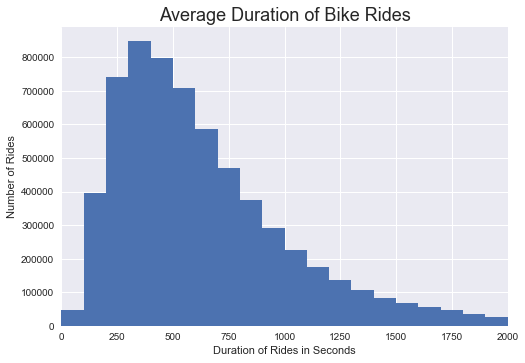

In [17]:
#Visualizing the data in a histogram
duration_bins = np.arange(0, gobike_df['duration_sec'].max() + 100, 100)
plt.hist(data = gobike_df, x = 'duration_sec', bins = duration_bins);

plt.xlim(0, 2000);
plt.style.use('seaborn')
plt.title('Average Duration of Bike Rides', fontsize = 18);
plt.xlabel('Duration of Rides in Seconds');
plt.ylabel('Number of Rides');
plt.style.use('seaborn');

## Age Groups That Took the Most Rides

In our next analysis here, we look at which age groups are taking the most rides. As you can see, there is definitely a right skew with age, but it might surprise you that the peak isn't on the left tail, either. Rather, the peak is more around that early 30's age. I know I was expecting the peak to be in the early- to mid-20's range!

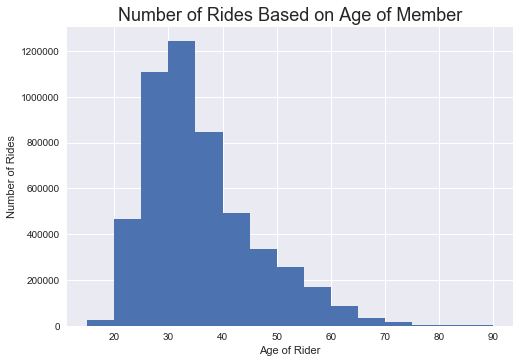

In [4]:
#Visualizing the data in a histogram
age_bins = np.arange(15, 90+5, 5)
plt.hist(data = gobike_df_membersonly, x = 'member_age', bins = age_bins);

plt.style.use('seaborn')
plt.title('Number of Rides Based on Age of Member', fontsize = 18);
plt.xlabel('Age of Rider');
plt.ylabel('Number of Rides');

## Members vs. Non-Member Counts

Because this dataset contains fields for both members of the Ford GoBike program as well as the non-members, I thought it would be interesting to see what the difference was like there. I've contained two visualizations below to support this. One is a strict comparison of numbers, and the other is a relative frequency distribution.

In [5]:
#Determining number of members and non-members
n_members = gobike_df_membersonly.shape[0]
n_nonmembers = gobike_df.shape[0] - n_members

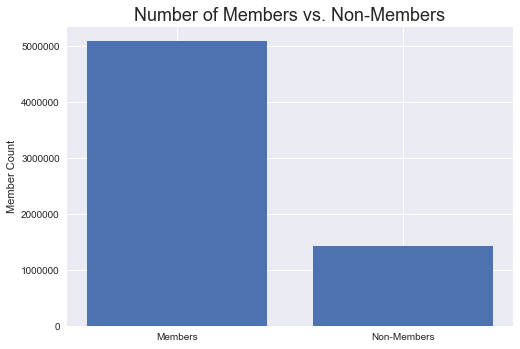

In [6]:
#Visualizing number of members vs. non-members in a pure count form
plt.bar(x = ['Members', 'Non-Members'], height = [n_members, n_nonmembers]);
plt.title('Number of Members vs. Non-Members', fontsize = 18);
plt.ylabel('Member Count');
plt.style.use('seaborn')

In [7]:
#Determining ratios of members vs. non-members
member_percentage = n_members / gobike_df.shape[0]
nonmember_percentage = n_nonmembers / gobike_df.shape[0]

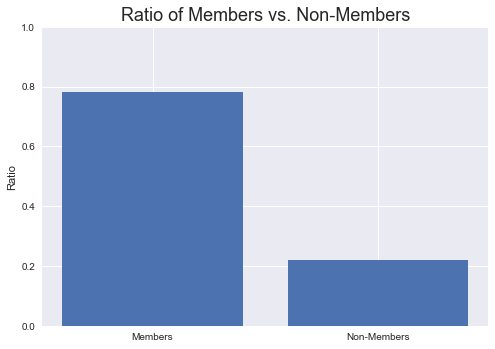

In [8]:
#Visualizing ratios of members vs. non-members
plt.bar(x = ['Members', 'Non-Members'], height = [member_percentage, nonmember_percentage]);
plt.title('Ratio of Members vs. Non-Members', fontsize = 18);
plt.ylabel('Ratio');
plt.ylim(0,1);
plt.style.use('seaborn')

## Number of Rides in a Given Month Over Time

In this next visualization, let's take a look at how many rides people took each month over time. While we see a general trend in growth, we see an interesting dip around November and December of 2018. My anticipation is that these are likely colder months were people are less inclined to be taking bike rides!

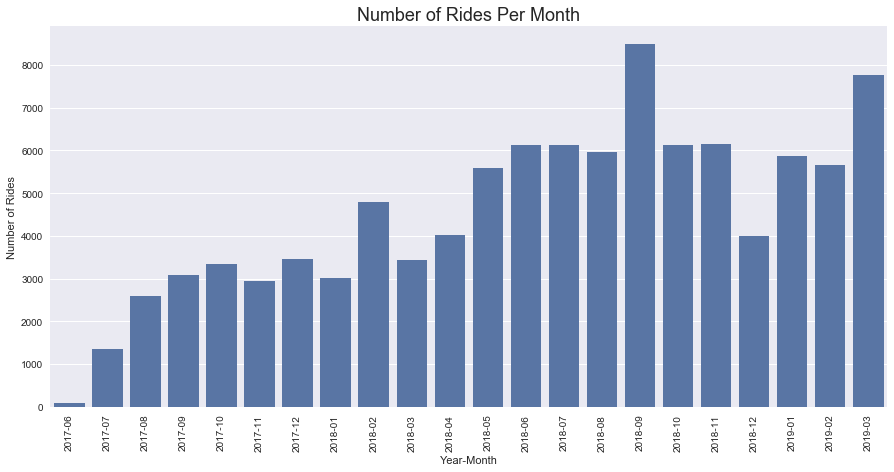

In [9]:
#Visualizing the data with a sample of 100000 records
plt.figure(figsize = (15, 7))
base_color = sb.color_palette()[0]
gobike_df_samp = gobike_df.sample(100000)
sb.countplot(data = gobike_df_samp.sort_values(by='year-month'), x = 'year-month', color = base_color);
plt.title('Number of Rides Per Month', fontsize = 18);
plt.xlabel('Year-Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90);
plt.style.use('seaborn')

## Number of Rides People Take Given Age

I was curious to see how many rides people would take given their age, so I've plotted that here in the scatterplot below. Unsurprisingly, this correlates largely to our first histogram visual in that omst of the rides seem to be clustered around that early 30's age range.

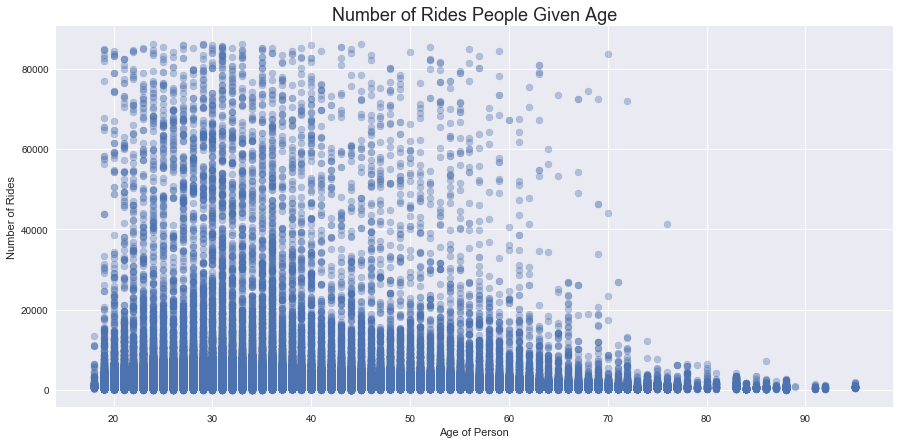

In [10]:
#Visualizing the data in a scatterplot
plt.figure(figsize = (15, 7))
plt.scatter(data = gobike_df_membersonly, x = 'member_age', y = 'duration_sec', alpha = 0.2);
plt.style.use('seaborn')
plt.title('Number of Rides People Given Age', fontsize = 18);
plt.xlabel('Age of Person');
plt.ylabel('Number of Rides');

## Average Ride Time Per Month

Where we did a general look at how many rides were taken each month in an earlier visual, this pointplot visual here shows the average durations of those rides per month. Not surprisingly, the longer rides seem to take place in the summer months whereas rides were shorter in those more wintry months.

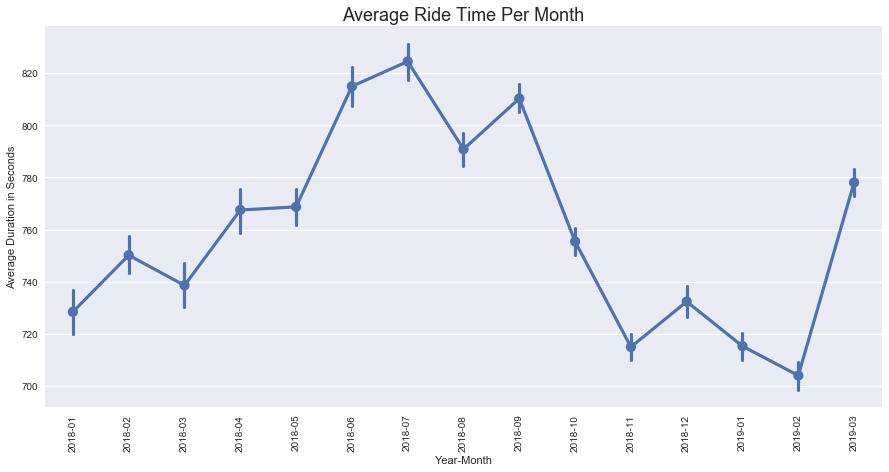

In [15]:
#Visualizing the data in a point plot
plt.figure(figsize = (15, 7))
sb.pointplot(data = gobike_df_membersonly.sort_values(by='year-month'), x = 'year-month', y = 'duration_sec');
plt.xticks(rotation = 90);
plt.title('Average Ride Time Per Month', fontsize = 18);
plt.ylabel('Average Duration in Seconds');
plt.xlabel('Year-Month');
plt.style.use('seaborn')

## Duration of Bike Rides from Top 5 Visited Stations

Now, let's look to see how long of bike rides were taken on average from the top 5 most visited stations. For the most part, they align pretty tightly together; however, the last station listed (San Franscisco Ferry Building) had a wider distribution of ride durations. Not living in San Franscisco myself, I honestly have no idea why this is!

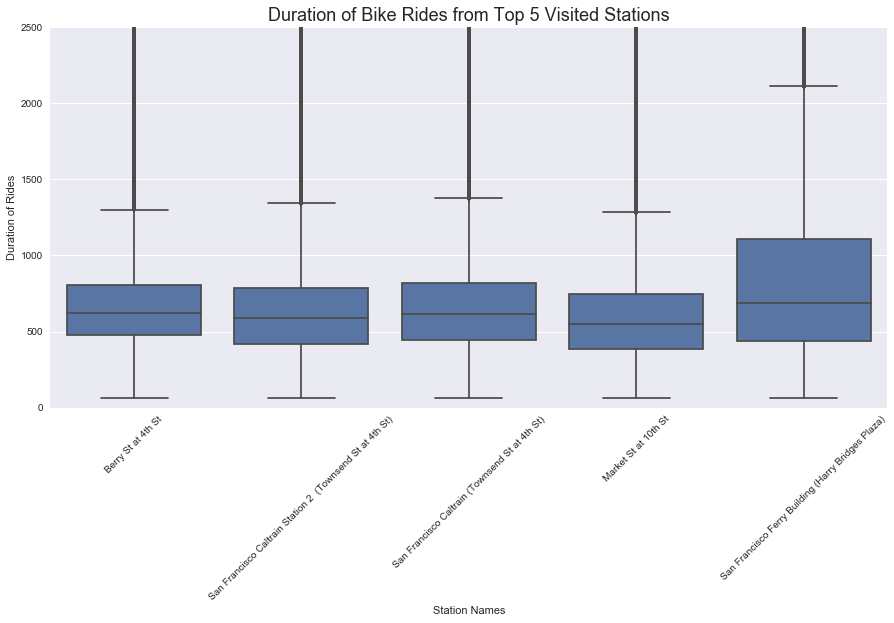

In [12]:
#Visualizing the data in a boxplot
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,7))
sb.boxplot(data = gobike_df_stations, x = 'start_station_name', y = 'duration_sec', color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 2500);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides')
plt.style.use('seaborn')

## Comparing Ride Duration Across Ages and Genders

Next up, let's take a look to see how genders and ages necessarily correlate to longer ride times in a single visual. Interestingly, there doesn't seem to be a strong indication that one gender necessarily rides longer than the other. While there's an unsurprising long tail when it comes to age, the data shows that people who listed their gender as "Female" or "Other" tend to ride just as long as those who listed their gender as "Male."

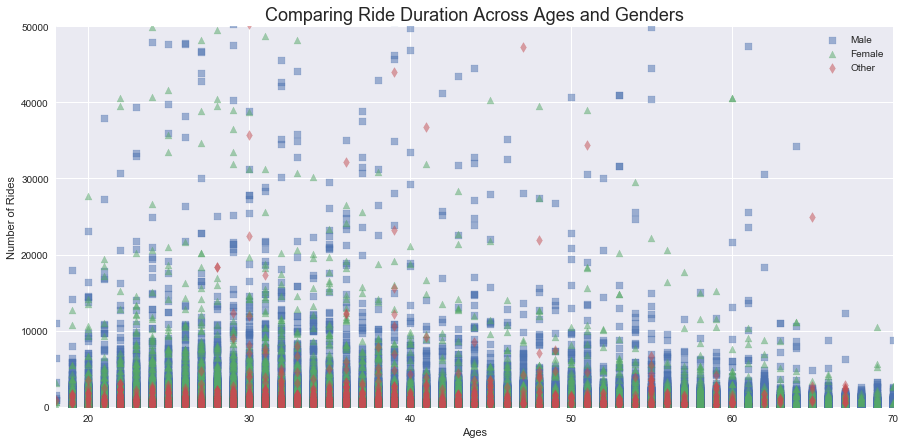

In [13]:
#Visualizing the data in an adapted scatterplot with a sample size of 250000 records
plt.figure(figsize = (15,7))

cat_markers = [['Male', 's'],
               ['Female', '^'],
               ['Other', 'd']]

for cat, marker in cat_markers:
    df_gender = gobike_df_mo_samp[gobike_df_mo_samp['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'member_age', y = 'duration_sec', marker = marker, alpha = .5);
plt.legend(['Male', 'Female', 'Other']);
plt.xlim(18, 70);
plt.ylim(0, 50000);
plt.title('Comparing Ride Duration Across Ages and Genders', fontsize = 18);
plt.xlabel('Ages');
plt.ylabel('Number of Rides');
plt.style.use('seaborn')

## Number of Rides People Took Across TIme, Grouped By Age

For our final visualization here, let's glance at the number of rides each individual age group took over time. What we see is an interesting spike for all age groups beginning in December 2018. I have no idea why this may be, but it would definitely be something worth digging into further!

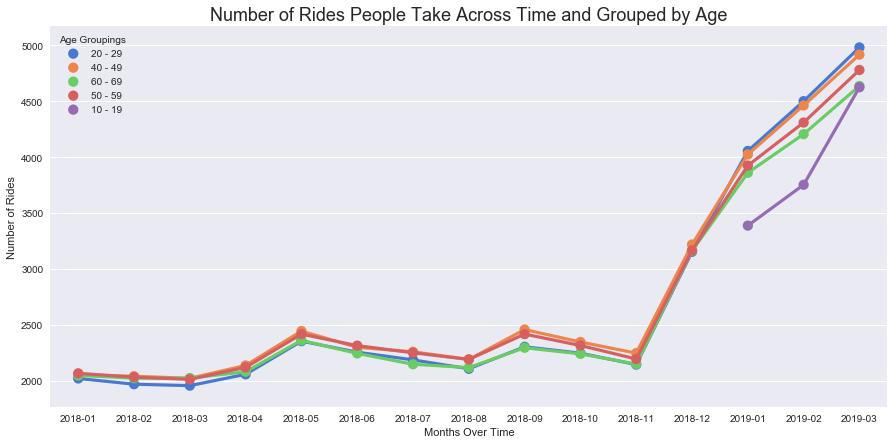

In [14]:
#Visualizing the data in an adapted pointplot with the errorbar removed
gobike_df_sub = gobike_df_membersonly.loc[gobike_df_membersonly['age_group'].isin(['10 - 19', '20 - 29', '30-39', '40 - 49',
                                                                              '50 - 59', '60 - 69'])]

plt.figure(figsize = (15, 7))
plt.style.use('seaborn')
sb.pointplot(data = gobike_df_sub.sort_values(by='year-month'), x = 'year-month', y = 'bike_id',
             hue = 'age_group', palette = 'muted', ci = None);
plt.title('Number of Rides Per Age Group Over Time', fontsize = 18);
plt.legend(title = 'Age Groupings');
plt.title('Number of Rides People Take Across Time and Grouped by Age', fontsize = 18);
plt.xlabel('Months Over Time');
plt.ylabel('Number of Rides');